# Titanic Überlebensrechner

Beschreibung Variablen:
https://www.eoda.de/wissen/blog/oeffentlich-verfuegbare-datensaetze-titanic/

weitere Quellen:
https://www.datascienceinstitute.net/blog/binary-logistic-regression-in-python-a-tutorial-part-1  <br>
https://towardsdatascience.com/mastering-p-values-in-machine-learning-bdc5bd0dd8ae

In [118]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl
%matplotlib inline


## Daten einlesen

In [119]:
df1 = pd.read_csv("titanic.csv")
df2 = pd.read_csv("eigener_Datensatz_Berufsschule.csv")
frames = [df1,df2]
df_titanic = pd.concat(frames)
df_titanic.head(-10)


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
880       Shelley, Mrs. William (Imanita Parrish Hall)  female  25.0      0   
881                                 Markun, Mr. Johann    male  33.0      0   
882                       Dahlberg, Miss. Gerda Ulrika  female  22.0      0   
883                      Banfield, Mr. Frederick James    male  28.0      0   
884                             Sutehall, Mr. Henry Jr    male  25.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
880      1            230433  26.0000   NaN        S  
881      0            349257   7.8958   NaN        S  
882      0              7552  10.5167   NaN        S  
883      0  C.A./SOTON 34068  10.5000   NaN        S  
884      0   SOTON/OQ 392076   7.0500   NaN        S  

[885 rows x 12 columns]

In [120]:
#Test df 1
df_titanic.loc[df_titanic['Name'] == "Sutehall, Mr. Henry Jr"]

PassengerId  Survived  Pclass                    Name   Sex   Age  SibSp  \
884          885         0       3  Sutehall, Mr. Henry Jr  male  25.0      0   

     Parch           Ticket  Fare Cabin Embarked  
884      0  SOTON/OQ 392076  7.05   NaN        S

In [121]:
#Test df 2
df_titanic.loc[df_titanic['Name'] == "Puth, Miss Mia"]

PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch  \
3          895         1       3  Puth, Miss Mia  female  25.0      1      0   

  Ticket  Fare Cabin Embarked  
3    NaN   NaN   NaN        S

## Datenaufbereitung

In [122]:
##überflüssige Spalten entfernen
df_titanic.drop(["Ticket","Fare","Cabin"], axis = 1, inplace =True)

In [123]:
# NaN, die nicht ersetzbar sind droppen
df_titanic['Survived'].isnull()
df_titanic = df_titanic.dropna(subset=['Survived'])
df_titanic = df_titanic.reset_index(drop=True)

df_titanic['Pclass'].isnull()
df_titanic = df_titanic.dropna(subset=['Pclass'])
df_titanic = df_titanic.reset_index(drop=True)

df_titanic['Sex'].isnull()
df_titanic = df_titanic.dropna(subset=['Sex'])
df_titanic = df_titanic.reset_index(drop=True)

df_titanic['Embarked'].isnull()
df_titanic = df_titanic.dropna(subset=['Embarked'])
df_titanic = df_titanic.reset_index(drop=True)

df_titanic['SibSp'].isnull()
df_titanic = df_titanic.dropna(subset=['SibSp'])
df_titanic = df_titanic.reset_index(drop=True)

df_titanic['Parch'].isnull()
df_titanic = df_titanic.dropna(subset=['Parch'])
df_titanic = df_titanic.reset_index(drop=True)


In [124]:
# ersetzbare NaN Werte ersetzen
df_titanic['Name'].fillna("no_name",inplace=True)

In [125]:
mean_Age = df_titanic['Age'].mean()
df_titanic['Age'].fillna(mean_Age,inplace=True)

In [126]:
# neue Spalte erstellen: definiert ob Passagier Kind ist
df_titanic["is_child"] = np.where(df_titanic['Age']>16, 0, 1)

In [127]:
# neue Spalte erstellen: gibt an ob Person allein reist oder nicht
Alone =  df_titanic.Parch + df_titanic.SibSp
df_titanic["Alone"] = np.where(Alone >= 1, 1, 0)


In [128]:
# neue Spalten erstellen: für logistische Regression bei pClass
df_titanic["isClass1"] = np.where(df_titanic['Pclass']==1, 1, 0)
df_titanic["isClass2"] = np.where(df_titanic['Pclass']==2, 1, 0)
df_titanic["isClass3"] = np.where(df_titanic['Pclass']==3, 1, 0)

In [129]:
##neue Spalten erstellen: für logistische Regression bei Embarked
df_titanic["isEmbarkedS"] = np.where(df_titanic["Embarked"] == "S", 1, 0)
df_titanic["isEmbarkedC"] = np.where(df_titanic["Embarked"] == "C", 1, 0)
df_titanic["isEmbarkedQ"] = np.where(df_titanic["Embarked"] == "Q", 1, 0)

In [130]:
# neue Spalte erstellen: Sex binär darstellen für logistische Regression
df_titanic["SexNum"] = np.where(df_titanic["Sex"] == "female",1,0)

In [131]:
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch Embarked  is_child  Alone  isClass1  isClass2  isClass3  isEmbarkedS  \
0      0        S         0      1         0         0         1            1   
1      0        C         0      1         1         0         0            0   
2      0        S         0      0         0         0         1            1   
3      0        S         0      1         1         0         0            1   
4      0        S         0      0         0         0         1            1   

   isEmbarkedC  isEmbarkedQ  SexNum  
0            0            0       0  
1            1            0       1  
2            0            0       1  
3            0            0       1  
4            0            0       0

## Deskriptive Statistiken

In [132]:
#Dataframe erstellen deskriptive Statistik 
df_des = DataFrame(index="A".split())

In [133]:
# Anzahl Passagiere
df_des["PassengerCnt"] = df_titanic["PassengerId"].count()


In [134]:
# neue Spalte erstellen: Anzahl Überlebte vs. Tote
df_des["DiedCnt"]=np.sum(df_titanic["Survived"]== 0)
df_des["SurvivedCnt"]=np.sum(df_titanic["Survived"]== 1)

In [135]:
# neue Spalte erstellen: Durchschnittsalter
df_des["AgeMean"]=df_titanic["Age"].mean()

# neue Spalte erstellen: jüngster Passagier
df_des["AgeMin"]=df_titanic["Age"].min()

# neue Spalte erstellen: ältester Passagier
df_des["AgeMax"]=df_titanic["Age"].max()

In [136]:
# neue Spalten erstellen: Verteilung Geschlecht
df_des["FemaleCnt"]=np.sum(df_titanic["Sex"]== "female")
df_des["MaleCnt"]=np.sum(df_titanic["Sex"]== "male")
df_des["ChildCnt"]=np.sum(df_titanic["is_child"]== 1)


In [137]:
# neue Spalten erstellen: Verteilung Klassen
df_des["Class1Cnt"]=np.sum(df_titanic["Pclass"]== 1)
df_des["Class2Cnt"]=np.sum(df_titanic["Pclass"]== 2)
df_des["Class3Cnt"]=np.sum(df_titanic["Pclass"]== 3)

In [138]:
# neue Spalten erstellen:  Verteilung Allein vs. mit Familie
df_des["AloneCnt"]=np.sum(df_titanic["Alone"]== 1)
df_des["WithFamilyCnt"]=np.sum(df_titanic["Alone"]== 0)

In [139]:
df_des.head()

PassengerCnt  DiedCnt  SurvivedCnt    AgeMean  AgeMin  AgeMax  FemaleCnt  \
A           893      550          343  29.599399    0.42    80.0        314   

   MaleCnt  ChildCnt  Class1Cnt  Class2Cnt  Class3Cnt  AloneCnt  WithFamilyCnt  
A      579       100        215        184        494       357            536

In [140]:
df_titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   893.000000  893.000000  893.000000  893.000000  893.000000   
mean    448.004479    0.384099    2.312430   29.599399    0.525196   
std     258.158623    0.486654    0.834938   12.952239    1.101712   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     225.000000    0.000000    2.000000   22.000000    0.000000   
50%     448.000000    0.000000    3.000000   29.599399    0.000000   
75%     671.000000    1.000000    3.000000   35.000000    1.000000   
max     895.000000    1.000000    3.000000   80.000000    8.000000   

            Parch    is_child       Alone    isClass1    isClass2    isClass3  \
count  893.000000  893.000000  893.000000  893.000000  893.000000  893.000000   
mean     0.381859    0.111982    0.399776    0.240761    0.206047    0.553191   
std      0.805521    0.315521    0.490127    0.427785    0.404691    0.497441   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
75%      0.000000    0.000000    1.000000    0.000000    0.000000    1.000000   
max      6.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       isEmbarkedS  isEmbarkedC  isEmbarkedQ      SexNum  
count   893.000000   893.000000   893.000000  893.000000  
mean      0.725644     0.188130     0.086226    0.351624  
std       0.446439     0.391035     0.280855    0.477745  
min       0.000000     0.000000     0.000000    0.000000  
25%       0.000000     0.000000     0.000000    0.000000  
50%       1.000000     0.000000     0.000000    0.000000  
75%       1.000000     0.000000     0.000000    1.000000  
max       1.000000     1.000000     1.000000    1.000000

## Regression

In [141]:
# dataframe regression erstellen
cols_log =   ["Survived", "Age", "SibSp","Parch","is_child", "Alone","isClass1","isClass2",
                "isClass3", "isEmbarkedS", "isEmbarkedC","isEmbarkedQ", "SexNum"]
df_log = DataFrame(data=df_titanic, columns= cols_log)
df_log.head()

Survived   Age  SibSp  Parch  is_child  Alone  isClass1  isClass2  \
0         0  22.0      1      0         0      1         0         0   
1         1  38.0      1      0         0      1         1         0   
2         1  26.0      0      0         0      0         0         0   
3         1  35.0      1      0         0      1         1         0   
4         0  35.0      0      0         0      0         0         0   

   isClass3  isEmbarkedS  isEmbarkedC  isEmbarkedQ  SexNum  
0         1            1            0            0       0  
1         0            0            1            0       1  
2         1            1            0            0       1  
3         0            1            0            0       1  
4         1            1            0            0       0

             Survived       Age     SibSp     Parch  is_child     Alone  \
Survived     1.000000 -0.075546 -0.031662  0.082999  0.121126  0.210925   
Age         -0.075546  1.000000 -0.231901 -0.177649 -0.592337 -0.177911   
SibSp       -0.031662 -0.231901  1.000000  0.414231  0.336956  0.584446   
Parch        0.082999 -0.177649  0.414231  1.000000  0.334411  0.581190   
is_child     0.121126 -0.592337  0.336956  0.334411  1.000000  0.319133   
Alone        0.210925 -0.177911  0.584446  0.581190  0.319133  1.000000   
isClass1     0.282277  0.314127 -0.052134 -0.013338 -0.125219  0.117889   
isClass2     0.092932  0.010295 -0.056917 -0.000901  0.003471  0.036406   
isClass3    -0.318355 -0.278515  0.091139  0.012203  0.104862 -0.130999   
isEmbarkedS -0.149104 -0.022435  0.069913  0.060963  0.011426 -0.025898   
isEmbarkedC  0.167729  0.034972 -0.060458 -0.011219  0.001699  0.092641   
isEmbarkedQ  0.003481 -0.013031 -0.026956 -0.081284 -0.020528 -0.087816   
SexNum       0.541949 -0.

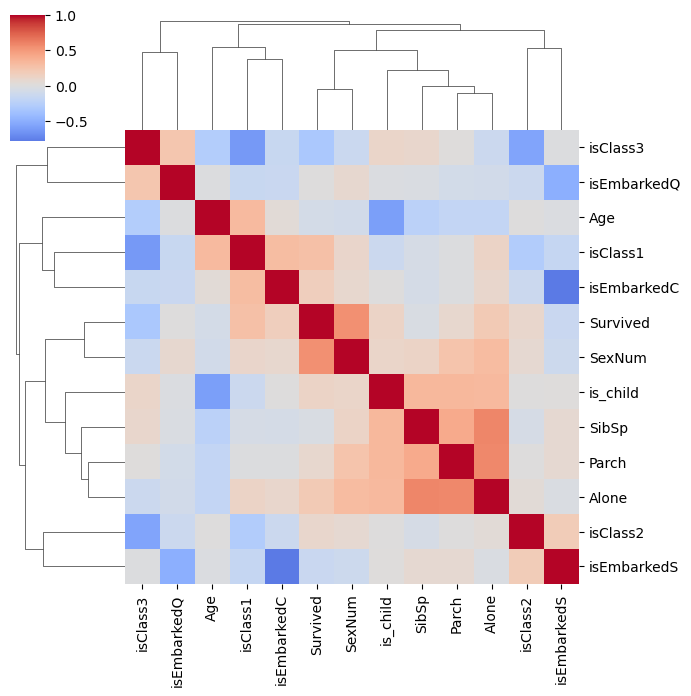

In [142]:
# paerson korrelations koeffizient
corrs = df_log.corr(method= 'pearson')
print(corrs)
sns.clustermap(corrs, cmap='coolwarm', center=0, figsize=(7,7))

#### Trainingsdaten und Testdaten erstellen

In [143]:
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(df_log.drop('Survived',axis=1), 
                                                    df_log['Survived'], test_size=0.30, 
                                                    random_state=101)

#### Regressionsmodell Güte testen

In [144]:
from sklearn import linear_model as lm
from sklearn import metrics as m
logmodel = lm.LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(m.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       155
           1       0.83      0.71      0.77       113

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision: proportion of positively predicted labels that are actually correct
        Precision Score = True Positives/ (False Positives + True Positives)

recall: represents the model’s ability to correctly predict the positives out of actual positives (true positive rate)
        Recall Score = True Positives / (False Negatives + True Positives)

accuracy: ratio of true positives and true negatives to all positive and negative observations. In other words, accuracy tells us how often we can expect our machine learning model will correctly predict an outcome out of the total number of times it made predictions.
        Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)

ignore: f1 score: harmonic mean of precision and recall score. It gives equal weight to both the Precision and Recall for measuring its performance in terms of accuracy thereby making it an alternative to Accuracy metrics 
        F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score)

support: x von n Daten gehören zu 0 bzw. 1, ergo 163 mal wird 0 predicted, 104 mal wird 1 predicted


sources: https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f
https://www.datacamp.com/tutorial/understanding-logistic-regression-python




### Regressionsmodelln Koeffizienten:

In [145]:
import statsmodels.formula.api as smf
survive_model = smf.logit(formula = 'Survived ~ Age + Parch + is_child + Alone + isClass1 + isClass2 + isClass3 + isEmbarkedS + isEmbarkedQ + isEmbarkedC + SexNum', data = df_log).fit() 
survive_model.summary()


         Current function value: 0.445918
         Iterations: 35


/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  893
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            9
Date:                Tue, 13 Feb 2024   Pseudo R-squ.:                  0.3305
Time:                        13:53:46   Log-Likelihood:                -398.20
converged:                      False   LL-Null:                       -594.77
Covariance Type:            nonrobust   LLR p-value:                 4.005e-79
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1910        nan        nan        nan         nan         nan
Age            -0.0245      0.009     -2.656      0.008      -0.043      -0.006
Parch          -0.3023      0.139     -2.180      0.029      -0.574      -0.030
is_child        0.6592      0.365      1.808      0.071      -0.055       1.374
Alone           0.1551      0.227      0.683      0.494      -0.290       0.600
isClass1        0.9812        nan        nan        nan         nan         nan
isClass2        0.0446        nan        nan        nan         nan         nan
isClass3       -1.2167        nan        nan        nan         nan         nan
isEmbarkedS    -0.3927        nan        nan        nan         nan         nan
isEmbarkedQ     0.0752        nan        nan        nan         nan         nan
isEmbarkedC     0.1265        nan        nan        nan         nan         nan
SexNum          2.6467      0.199     13.275      0.000       2.256       3.037
===============================================================================
"""

p values über 0.05 kicken  <br>
p-value misst Wahrscheinlichkeit, dass keine Beziehung zwischen Variablen besteht. Niedriger p-value spricht gegen Nullhypothese, hoher p-value spricht dafür.  <br>
p-values unter 0.05 bedeuten, dass nur eine 5% Wahrscheinlichkeit besteht, dass KEINE Beziehung zwischen survived und der jeweiligen Variable besteht oder dass, nur 5% Wahrscheinlichkeit vorhanden ist, dass die Beziehung zwischen survived und der jeweiligen Variable durch Zufall entstanden ist.


In [146]:

survive_model = smf.logit(formula = 'Survived ~ Age + Parch + isClass1 + isClass2 + isClass3 + SexNum', data = df_log).fit() ##alle p-values über 5% entfernt
survive_model.summary()

Optimization terminated successfully.
         Current function value: 0.451801
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  893
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            6
Date:                Tue, 13 Feb 2024   Pseudo R-squ.:                  0.3217
Time:                        13:53:46   Log-Likelihood:                -403.46
converged:                       True   LL-Null:                       -594.77
Covariance Type:            nonrobust   LLR p-value:                 1.520e-79
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0663        nan        nan        nan         nan         nan
Age           -0.0355      0.008     -4.713      0.000      -0.050      -0.021
Parch         -0.2132      0.111     -1.923      0.055      -0.431       0.004
isClass1       1.1245        nan        nan        nan         nan         nan
isClass2      -0.0063        nan        nan        nan         nan         nan
isClass3      -1.1845        nan        nan        nan         nan         nan
SexNum         2.6882      0.193     13.901      0.000       2.309       3.067
==============================================================================
"""

##### nochmal Güte Modell testen

In [147]:
predicted_values1 = survive_model.predict()
threshold=0.5
predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1
cm1 = m.confusion_matrix(df_log['Survived'],predicted_class1)
print('Confusion Matrix : \n', cm1)  

Confusion Matrix : 
 [[461  89]
 [ 98 245]]


True Positive: 460__ False Positive: 90  <br>
False Negative: 99__ True Negative: 246

In [148]:
print(m.classification_report(df_log['Survived'],predicted_class1))  

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       550
           1       0.73      0.71      0.72       343

    accuracy                           0.79       893
   macro avg       0.78      0.78      0.78       893
weighted avg       0.79      0.79      0.79       893



# Ausgabe Wahrscheinlichkeiten Testdaten

In [149]:
# Wahrscheinlichkeiten für jede Klasse für Testdaten
probabilities = logmodel.predict_proba(X_test)

# Klassennamen 
class_names = logmodel.classes_

# Ausgabe von Wahrscheinlichkeiten mit Klassennamen
for i, prob in enumerate(probabilities):
    print("Wahrscheinlichkeiten für Datensatz {}: ".format(i+1))
    for j, class_prob in enumerate(prob):
        print("   Klasse {}: {:.4f}".format(class_names[j], class_prob))


Wahrscheinlichkeiten für Datensatz 1: 
   Klasse 0: 0.3885
   Klasse 1: 0.6115
Wahrscheinlichkeiten für Datensatz 2: 
   Klasse 0: 0.8960
   Klasse 1: 0.1040
Wahrscheinlichkeiten für Datensatz 3: 
   Klasse 0: 0.1951
   Klasse 1: 0.8049
Wahrscheinlichkeiten für Datensatz 4: 
   Klasse 0: 0.7921
   Klasse 1: 0.2079
Wahrscheinlichkeiten für Datensatz 5: 
   Klasse 0: 0.7391
   Klasse 1: 0.2609
Wahrscheinlichkeiten für Datensatz 6: 
   Klasse 0: 0.7205
   Klasse 1: 0.2795
Wahrscheinlichkeiten für Datensatz 7: 
   Klasse 0: 0.8506
   Klasse 1: 0.1494
Wahrscheinlichkeiten für Datensatz 8: 
   Klasse 0: 0.0946
   Klasse 1: 0.9054
Wahrscheinlichkeiten für Datensatz 9: 
   Klasse 0: 0.3954
   Klasse 1: 0.6046
Wahrscheinlichkeiten für Datensatz 10: 
   Klasse 0: 0.1233
   Klasse 1: 0.8767
Wahrscheinlichkeiten für Datensatz 11: 
   Klasse 0: 0.1523
   Klasse 1: 0.8477
Wahrscheinlichkeiten für Datensatz 12: 
   Klasse 0: 0.1807
   Klasse 1: 0.8193
Wahrscheinlichkeiten für Datensatz 13: 
   Klasse

# Neue Wahrscheinlichkeiten berechnen

In [150]:
new_passenger_data = {
    'Age': [19],
    'Parch': [0], #Reise in Begleitung (0 nein, 1 ja)
    'isClass1': [1],
    'isClass2': [0],
    'isClass3': [0],
    'SexNum': [1] #Geschlecht 0 männlich, 1 weiblich
}

# DataFrame für die neuen Daten erstellen
new_data = pd.DataFrame(new_passenger_data)

# Vorhersagen treffen
predictions_new_data = survive_model.predict(new_data)
probability_survival = predictions_new_data[0].round(4) * 100  

#Ausgabe
print(f"Die Überlebenswahrscheinlichkeit beträgt {probability_survival} %.")


Die Überlebenswahrscheinlichkeit beträgt 95.57 %.


Bsp 1: Rose: age 17, parch 1, class 1, female = 95% Überlebenschance
Bsp 2: Jack, age 19, parch 0, class 3, male = 12% Überlebenschance

# Visualisierungen

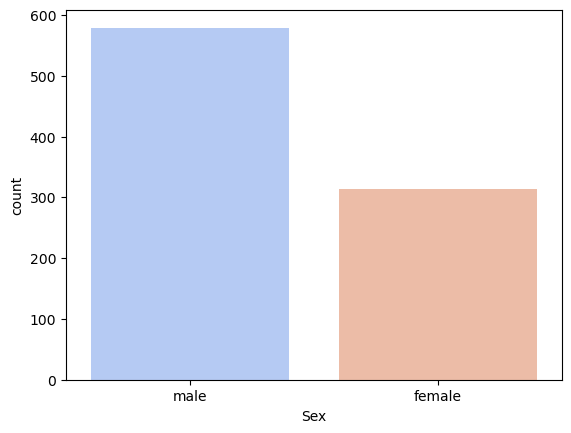

In [151]:
# Verteilung nach Geschlecht
sns.countplot( x ='Sex', data = df_titanic, palette = 'coolwarm')
plt.show()

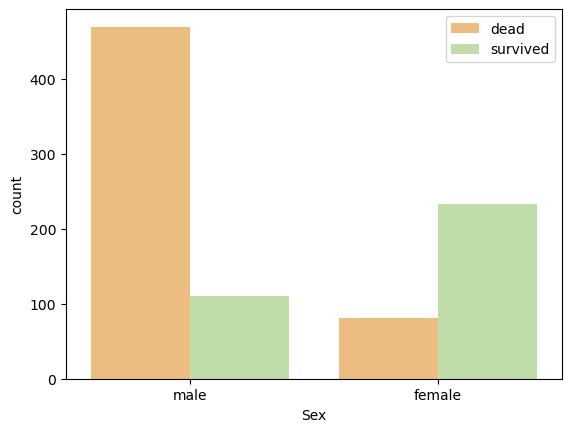

In [152]:
ax = sns.countplot( x= 'Sex', data = df_titanic, hue = 'Survived', palette= "Spectral")
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['dead','survived'], bbox_to_anchor=(1,1))
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

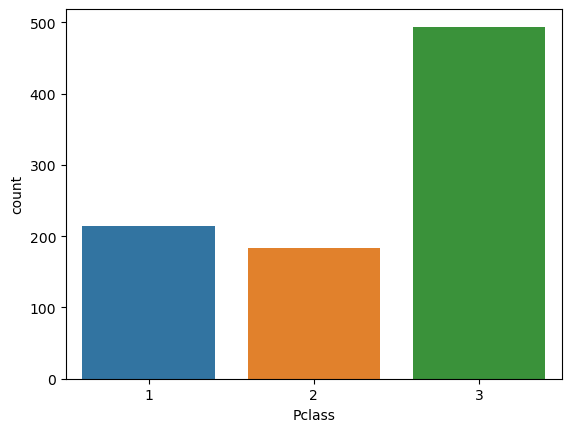

In [153]:
sns.countplot( x = 'Pclass',data=df_titanic)


<Axes: >

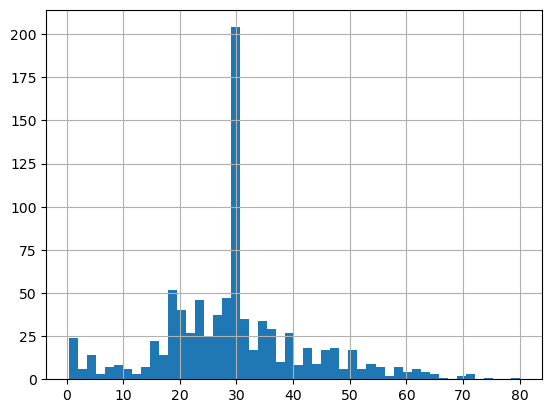

In [154]:
df_titanic['Age'].hist(bins=50)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


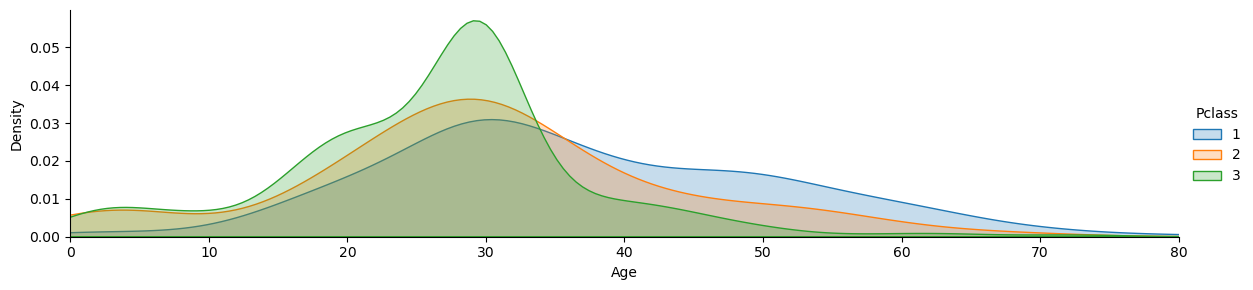

In [155]:
# alter/klasse
fig = sns.FacetGrid(df_titanic, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = df_titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

<Axes: xlabel='Embarked', ylabel='count'>

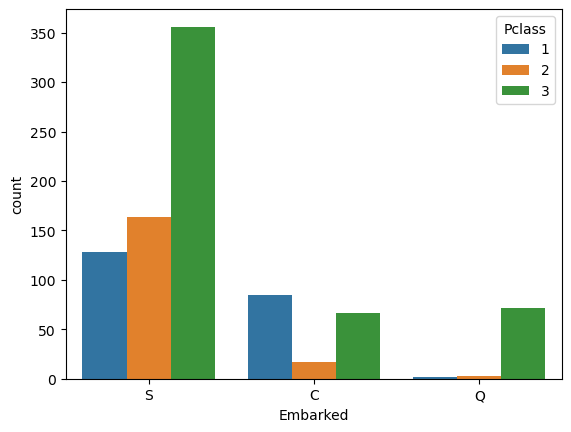

In [156]:
#einstiegshafen pro klasse
sns.countplot(x ='Embarked',data=df_titanic,hue='Pclass')

<Axes: xlabel='Alone', ylabel='count'>

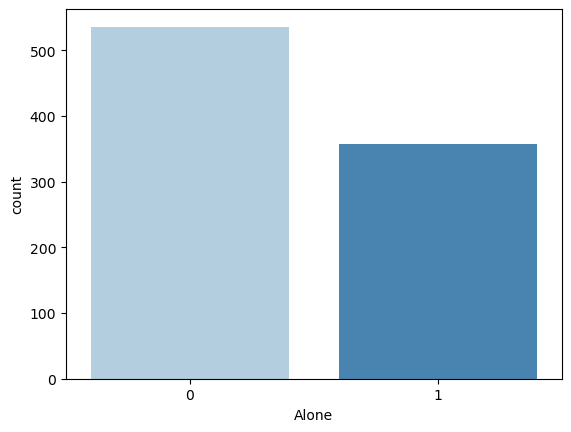

In [157]:
sns.countplot(x='Alone',data=df_titanic,palette='Blues')

<Axes: xlabel='Alone', ylabel='count'>

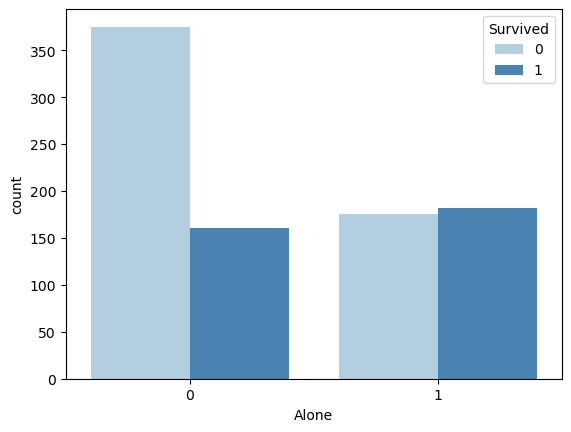

In [158]:
sns.countplot(x='Alone',data=df_titanic,hue = 'Survived',palette='Blues')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


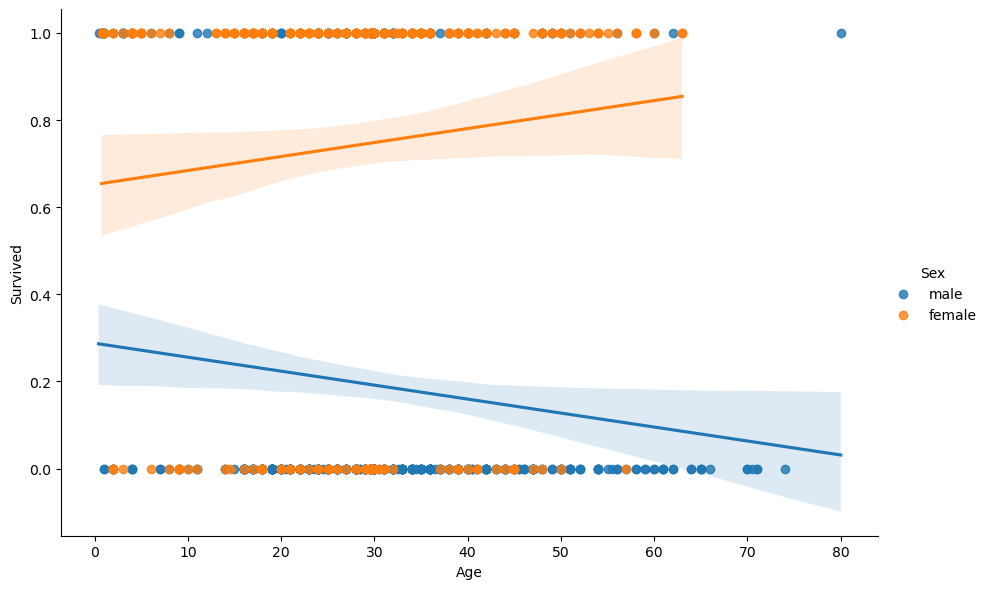

In [159]:
g = sns.lmplot(x="Age", y="Survived", hue="Sex", data=df_titanic, height=6, aspect=1.5)
g.set_axis_labels("Age", "Survived")


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


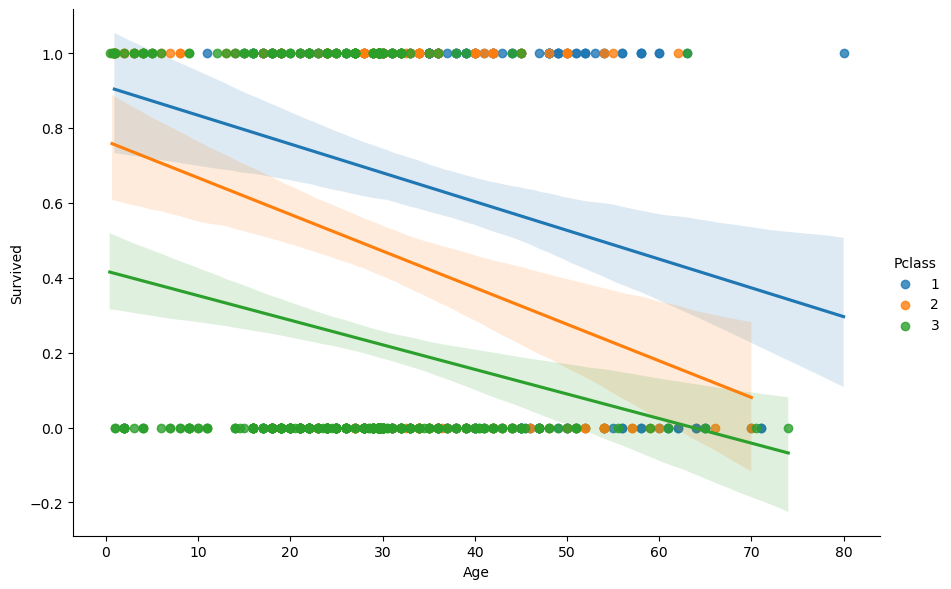

In [160]:
g = sns.lmplot(x="Age", y="Survived", hue="Pclass", data=df_titanic, height=6, aspect=1.5)
g.set_axis_labels("Age", "Survived")

In [161]:
df_des.head()

PassengerCnt  DiedCnt  SurvivedCnt    AgeMean  AgeMin  AgeMax  FemaleCnt  \
A           893      550          343  29.599399    0.42    80.0        314   

   MaleCnt  ChildCnt  Class1Cnt  Class2Cnt  Class3Cnt  AloneCnt  WithFamilyCnt  
A      579       100        215        184        494       357            536